<a href="https://colab.research.google.com/github/Zenithcoder/analyst-job-roles-in-canada/blob/main/analyst_job_roles_in_canada_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install adjustText

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from adjustText import adjust_text
import geopandas as gpd
import networkx as nx
import textwrap
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Exploratory Data Analysis

In [4]:
df = pd.read_csv('./Cleaned_Dataset.csv')

In [5]:
df.head(5)

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [6]:
df.isnull().sum()

,0
Job Title,0
Job Info,0
Position,0
Employer,0
City,0
Province,0
Skill,0
Seniority,0
Work Type,0
Industry Type,0


In [11]:
job_counts = df['Job Title'].value_counts()
total_count = job_counts.sum()
job_percentages = (job_counts / total_count) * 100
print(job_counts)
print(total_count)
print(job_percentages)

Job Title
Senior Supply Chain Data Analysts        262
Senior Business Intelligence Analysts    229
Senior Business Analysts                 214
Business Systems Analysts                187
Systems and Data Analysts                185
Senior Data Analysts                     170
Financial and Operational Analysts       163
Business and Technical Analysts          160
Business and Marketing Analysts          159
Database Analysts                         67
Name: count, dtype: int64
1796
Job Title
Senior Supply Chain Data Analysts        14.587973
Senior Business Intelligence Analysts    12.750557
Senior Business Analysts                 11.915367
Business Systems Analysts                10.412027
Systems and Data Analysts                10.300668
Senior Data Analysts                      9.465479
Financial and Operational Analysts        9.075724
Business and Technical Analysts           8.908686
Business and Marketing Analysts           8.853007
Database Analysts                       

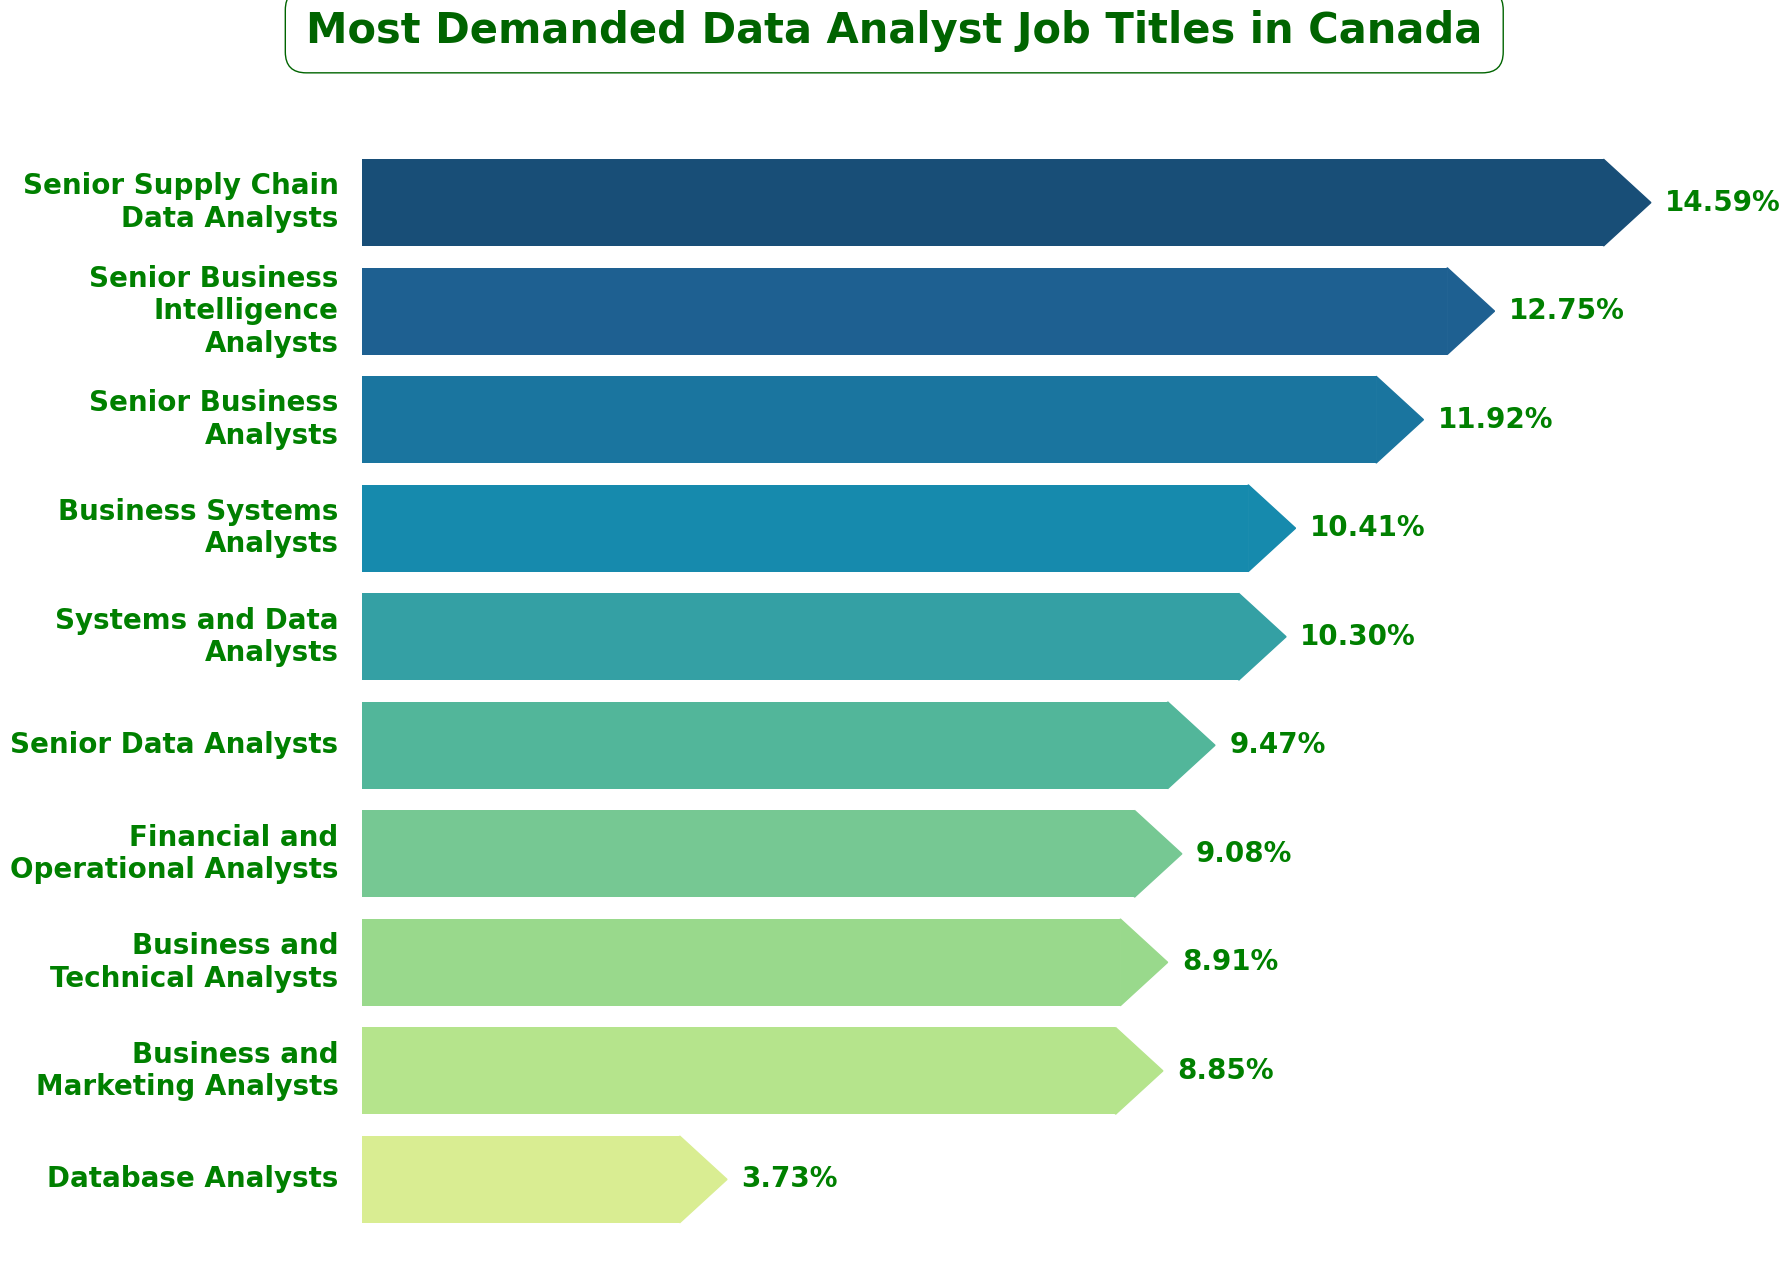

In [14]:
# Figuring most demanded job title for data jobs
job_counts = df['Job Title'].value_counts()
total_count = job_counts.sum()
job_percentages = (job_counts / total_count) * 100

# Sort job titles by count in ascending order
job_counts = job_counts.sort_values(ascending=True)
job_percentages = job_percentages.reindex(job_counts.index)

# Set up the plot with an increased figure size
plt.figure(figsize=(18, 12))

# Defining color palette
colors = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad', '#1a759f', '#1e6091', '#184e77']

# Plot horizontal bars
bar_height = 0.8
bars = plt.barh(job_counts.index, job_counts.values, color=colors, height=bar_height, edgecolor='none')

# Customize y-axis to show job titles aligned with bars
for bar, title in zip(bars, job_counts.index):
    # Wrap job titles along the width of the bar
    wrapped_title = textwrap.fill(title, width=20)
    plt.text(bar.get_width() - bar.get_width() - 5.0,
             bar.get_y() + bar.get_height() / 2,
             wrapped_title,
             ha='right', va='center',
             fontsize=20, fontweight='bold', color='green')

# Adjust the position of the job titles closer to the bars
plt.gca().tick_params(axis='y', which='major', pad=10)


for bar, percentage, color in zip(bars, job_percentages.values, colors):

    # Add the percentage text to the right of the bar
    plt.text(bar.get_width() + 13.0,
             bar.get_y() + bar.get_height() / 2,
             f'{percentage:.2f}%',
             ha='left', va='center',
             fontsize=20, color='green', fontweight='bold')




    # Add a left-pointing triangle to the right of each bar
    triangle_height = bar_height
    triangle_y = [
        bar.get_y() + bar.get_height() / 2,  # Center of the bar
        bar.get_y(),  # Bottom point
        bar.get_y() + bar.get_height()  # Top point
    ]
    triangle_x = [
        bar.get_width() + 10,  # Right point, move triangle to the right of the bar
        bar.get_width() ,  # Top point, to the left
        bar.get_width()   # Bottom point, to the left
    ]

    # Create a triangle with the same color
    plt.fill(triangle_x, triangle_y, color=color)

# Remove y-axis labels
plt.xticks([])
plt.yticks([])

# Chart Title
plt.figtext(0.5, 1.05, 'Most Demanded Data Analyst Job Titles in Canada', ha='center', va='center',
            fontsize=30, fontweight='bold', color='darkgreen',
            bbox=dict(facecolor='white', edgecolor='darkgreen', boxstyle='round,pad=0.5', linewidth=1))


# Remove plot border and grid lines
plt.box(False)
plt.gca().xaxis.grid(False)

# Adjust layout to fit the plot
plt.tight_layout()

# Show the plot
plt.show()


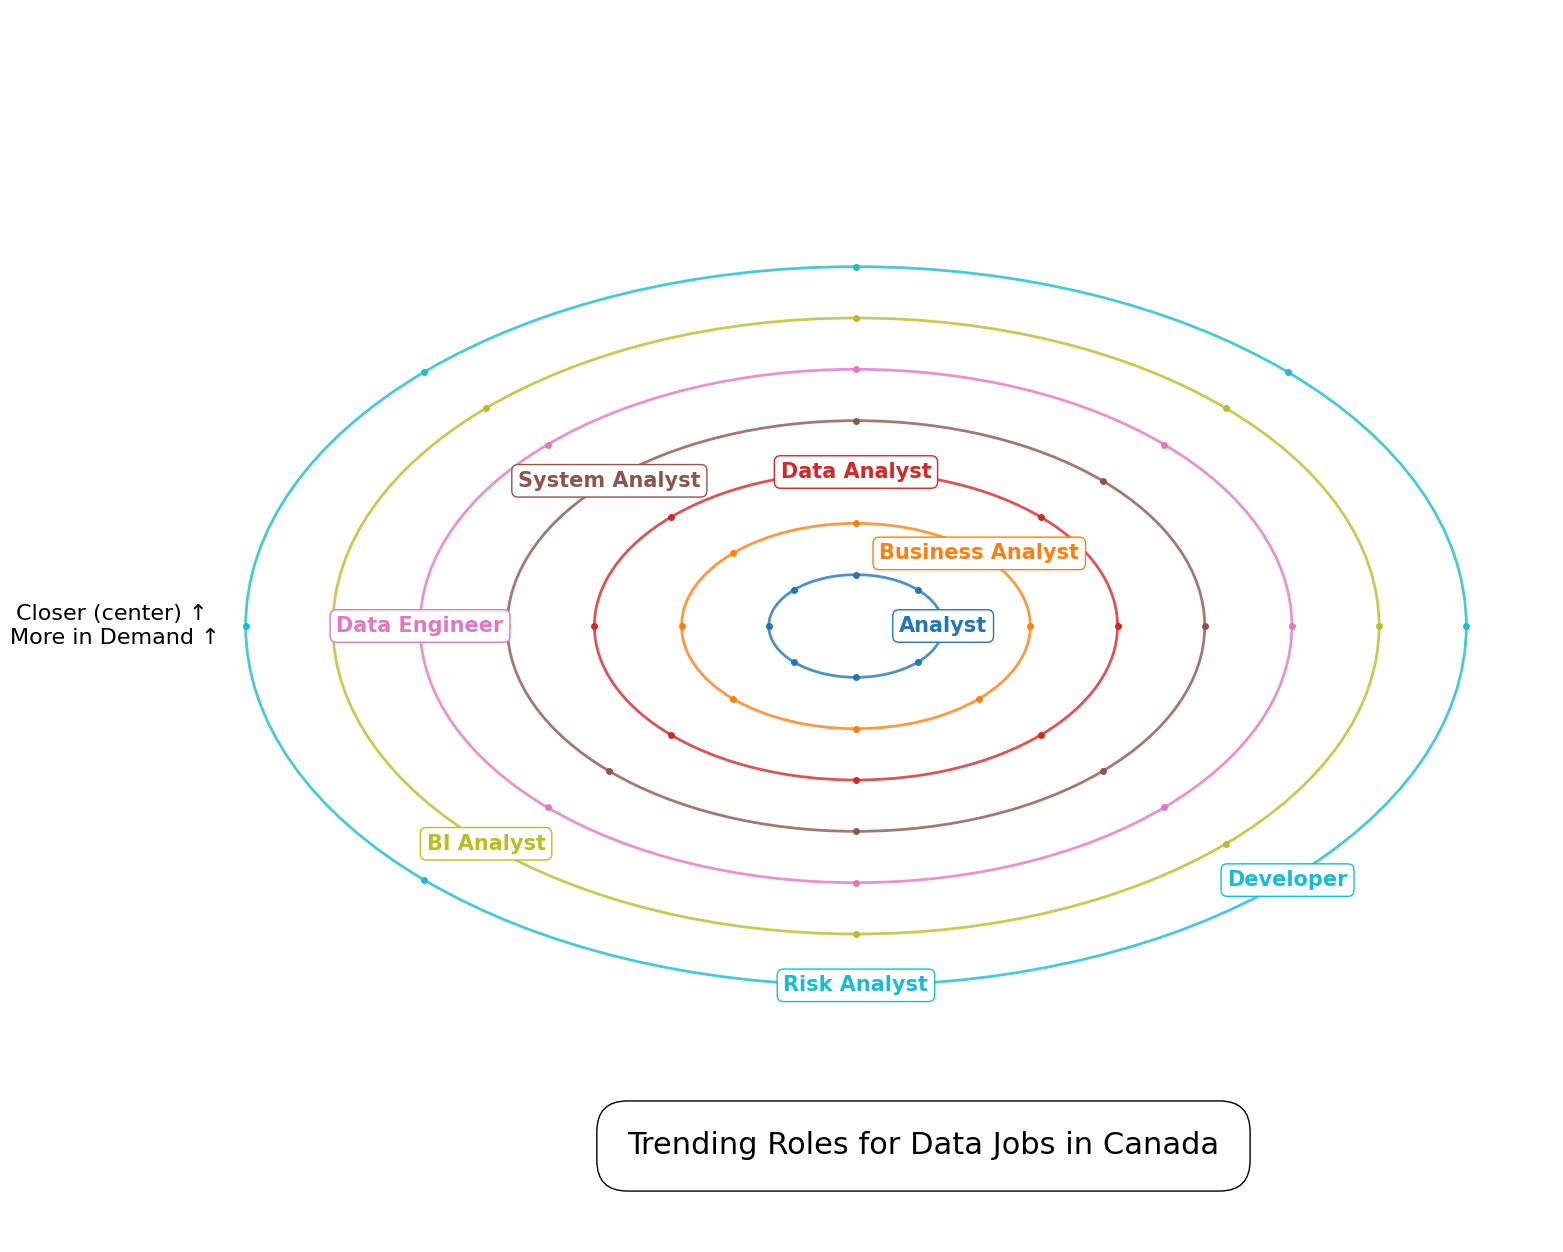

In [16]:
# Get the top 8 positions
top_positions = df['Position'].value_counts().head(8)

# Define the number of orbits based on unique position counts
unique_counts = sorted(top_positions.unique(), reverse=True)
num_orbits = len(unique_counts)
#print(unique_counts)
#print(num_orbits)

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 16))
ax.set_xlim(-16, 16)
ax.set_ylim(-12, 12)

# Draw the orbits (ellipses for a flat 3D look)
colors = plt.cm.tab10(np.linspace(0, 1, num_orbits))  # Gradient colors

for i in range(num_orbits):
    ellipse = Ellipse((0, 0), width=(i + 1) * 4, height=(i + 1) * 2, edgecolor=colors[i],
                      facecolor='none', linestyle='-', alpha=0.8, linewidth=2)
    ax.add_artist(ellipse)

# Plot the positions as planets on the respective orbits with creative spacing
for i, (position, count) in enumerate(top_positions.items()):
    orbit_level = unique_counts.index(count) + 1
    angle = 2 * np.pi * i / len(top_positions)  # Distribute planets evenly
    x = orbit_level * 2 * np.cos(angle)
    y = orbit_level * np.sin(angle)  # Flatten the y-axis for a flat look

    color_index = unique_counts.index(count)  # Use count index to map color
    text_color = colors[color_index]
    ax.text(x, y, position, ha='center', va='center', fontsize=15, color=text_color, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor=text_color, boxstyle='round,pad=0.3'))

# Add some aesthetic points or small circles to emphasize the orbits
for i in range(num_orbits):
    for j in range(len(top_positions)):
        angle = 2 * np.pi * j / len(top_positions)
        x = (i + 1) * 2 * np.cos(angle)
        y = (i + 1) * np.sin(angle)
        ax.plot(x, y, 'o', color=colors[i], markersize=4)

# Chart Title
plt.figtext(0.55, 0.17, 'Trending Roles for Data Jobs in Canada', ha='center', va='center',
            fontsize=22, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))


# Add a descriptive label
label_text = "Closer (center) ↑ \nMore in Demand ↑"
ax.text(-17, 0, label_text, ha='center', va='center', fontsize=16, color='black')
# Remove axes and grids for a clean look
ax.axis('off')

plt.show()


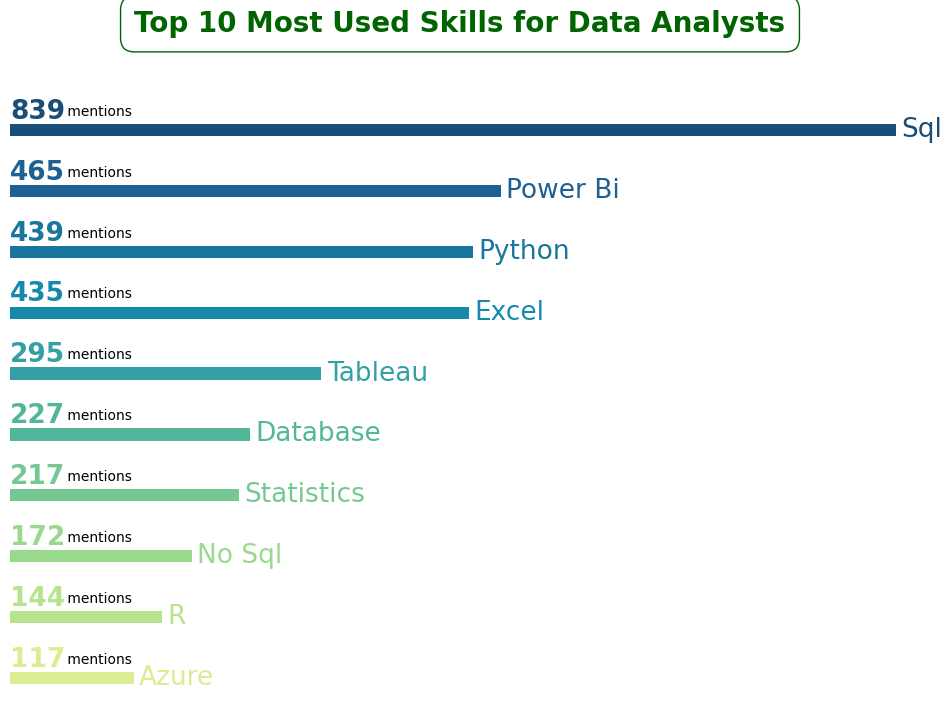

In [17]:
# Step 1: Split the comma-separated strings into lists of skills
df['Skill_Split'] = df['Skill'].str.split(',\s*')

# Step 2: Flatten the list of skills, and ignore 'Undef'
all_skills = [skill.strip().title() for sublist in df['Skill_Split'] for skill in sublist if skill.lower() != 'undef']

# Step 3: Create a pandas Series to count occurrences of each skill
skill_counts = pd.Series(all_skills).value_counts()

total_mentions = skill_counts.sum()
skill_percentages = (skill_counts / total_mentions) * 100

# Step 4: Get the top 10 most used skills (skill names and their counts)
top_10_skills = skill_counts.head(10).sort_values(ascending=True)

# Step 5: Define color palette; We are defining 10 colors
colors = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad', '#1a759f', '#1e6091', '#184e77']

# Step 6: Graph plotting
plt.figure(figsize=(12, 8))

bars = plt.barh(top_10_skills.index, top_10_skills.values, color=colors, height=0.2)

# Remove axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Add skill names and count labels on top of the bars
for bar, count, color, skill in zip(bars, top_10_skills.values, colors, top_10_skills.index):
    # Position the text
    x = bar.get_width() - bar.get_width() # Start of the text (right end of the bar)
    y = bar.get_y() + bar.get_height() * 2  # Vertical center of the bar


    # Add the count with normal style
    plt.text(x, y, f'{count}',
             va='center', ha='left',
             fontsize=19,
             fontweight='bold',
             color= color)

    plt.text(x + 50, y, ' mentions ',
             va='center', ha='left',
             fontsize=10,
             fontweight='normal',
             color='black')



    plt.text(bar.get_width() + 5,
             bar.get_y() + bar.get_height() / 2,
             f'{skill}',
             va='center', ha='left', fontsize=19, color= color)

# Chart Title
plt.figtext(0.5, 0.97, 'Top 10 Most Used Skills for Data Analysts', ha='center', va='center',
            fontsize=20, fontweight='bold', color='darkgreen',
            bbox=dict(facecolor='white', edgecolor='darkgreen', boxstyle='round,pad=0.5', linewidth=1))

# Remove plot border
plt.box(False)

# Display the plot
plt.show()

                     Province  Job_Postings
0                     Ontario           949
1            British Columbia           243
2                     Alberta           192
3                      Quebec           176
4                         NaN           118
5                    Manitoba            37
6                 Nova Scotia            34
7               New Brunswick            21
8                Saskatchewan            16
9   Newfoundland and Labrador             5
10            Yukon Territory             2
11       Prince Edward Island             1
12      Northwest Territories             1
13                    Nunavut             1


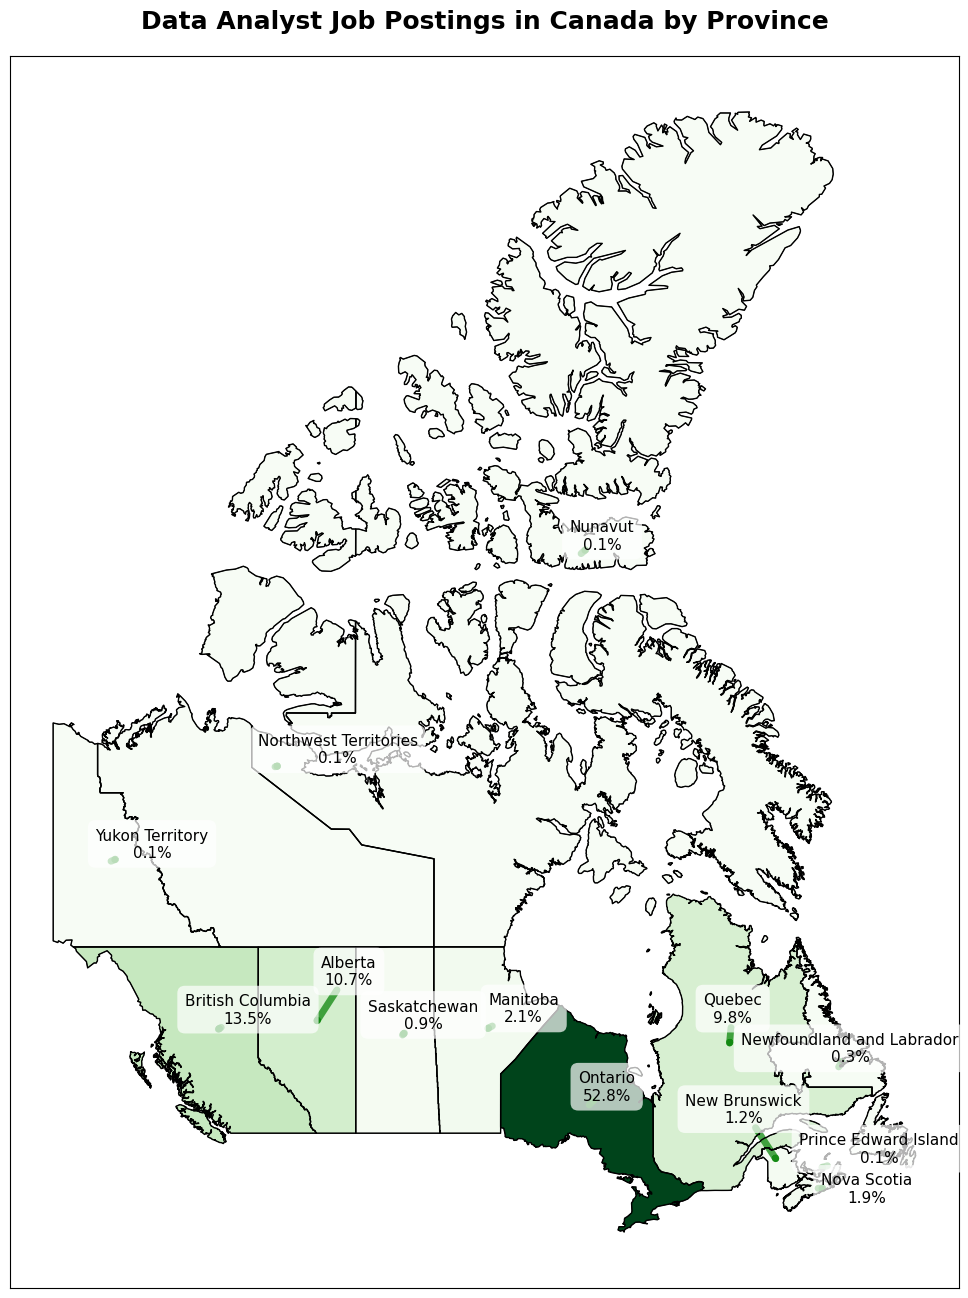

In [20]:
# Step 1: Create a mapping from abbreviations to full province names
# Since our dataset contains abbreviations and we are using available `canada.geojson` to create a graph.
# Canada Geo downloaded from:
# https://github.com/codeforgermany/click_that_hood/blob/main/public/data/canada.geojson
province_mapping = {
    'ON': 'Ontario',
    'QC': 'Quebec',
    'AB': 'Alberta',
    'MB': 'Manitoba',
    'SK': 'Saskatchewan',
    'BC': 'British Columbia',
    'NS': 'Nova Scotia',
    'NB': 'New Brunswick',
    'PE': 'Prince Edward Island',
    'NL': 'Newfoundland and Labrador',
    'NT': 'Northwest Territories',
    'NFL': 'Nunavut',
    'YT': 'Yukon Territory'
}

# Count job postings by province
province_counts = df['Province'].value_counts().reset_index()
province_counts.columns = ['Province', 'Job_Postings']
#print(province_counts)
# Map abbreviations to full names
province_counts['Province'] = province_counts['Province'].map(province_mapping)
print(province_counts)
# Calculate total job postings and percentages
total_postings = province_counts['Job_Postings'].sum()
province_counts['Percentage'] = (province_counts['Job_Postings'] / total_postings) * 100

# Load the GeoDataFrame
gdf = gpd.read_file('./canada.geojson')

# Merge job postings data with geographical data
gdf = gdf.merge(province_counts, left_on='name', right_on='Province', how='left')

# Re-project to a suitable projected CRS
gdf = gdf.to_crs(epsg=3857)

# Calculate centroids in the projected CRS
gdf['centroid'] = gdf.geometry.centroid

# Fill missing values in 'Job_Postings' with 0
gdf['Job_Postings'] = gdf['Job_Postings'].fillna(0)
gdf['Percentage'] = gdf['Percentage'].fillna(0)

# Plot the choropleth map with annotations
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Plot the provinces with job postings
gdf.boundary.plot(ax=ax, linewidth=1, color='black')
gdf.plot(column='Job_Postings', ax=ax, cmap='Greens', edgecolor='black', linewidth=0.5)

# Collect text annotations
texts = []
for x, y, label, percent in zip(gdf['centroid'].x, gdf['centroid'].y, gdf['Province'], gdf['Percentage']):
    texts.append(ax.text(x, y, f'{label}\n{percent:.1f}%', fontsize=11,
                         ha='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')))

# Adjust text to avoid overlap
adjust_text(texts, ax=ax, only_move={'points':'x', 'text':'xy'},
            arrowprops=dict(arrowstyle="->", color='green', alpha=0.7, lw=5))

# Remove x-axis and y-axis values & ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Data Analyst Job Postings in Canada by Province', weight='bold', fontsize=18, pad=20)

plt.show(block=True)


Province  City      
AB        Calgary       100
          Edmonton       59
          Banff           5
          Leduc           4
          Beaumont        3
                       ... 
Undef     Canada         14
          Engineer        2
          Ontario         1
          North York      1
YT        Whitehorse      2
Name: count, Length: 185, dtype: int64


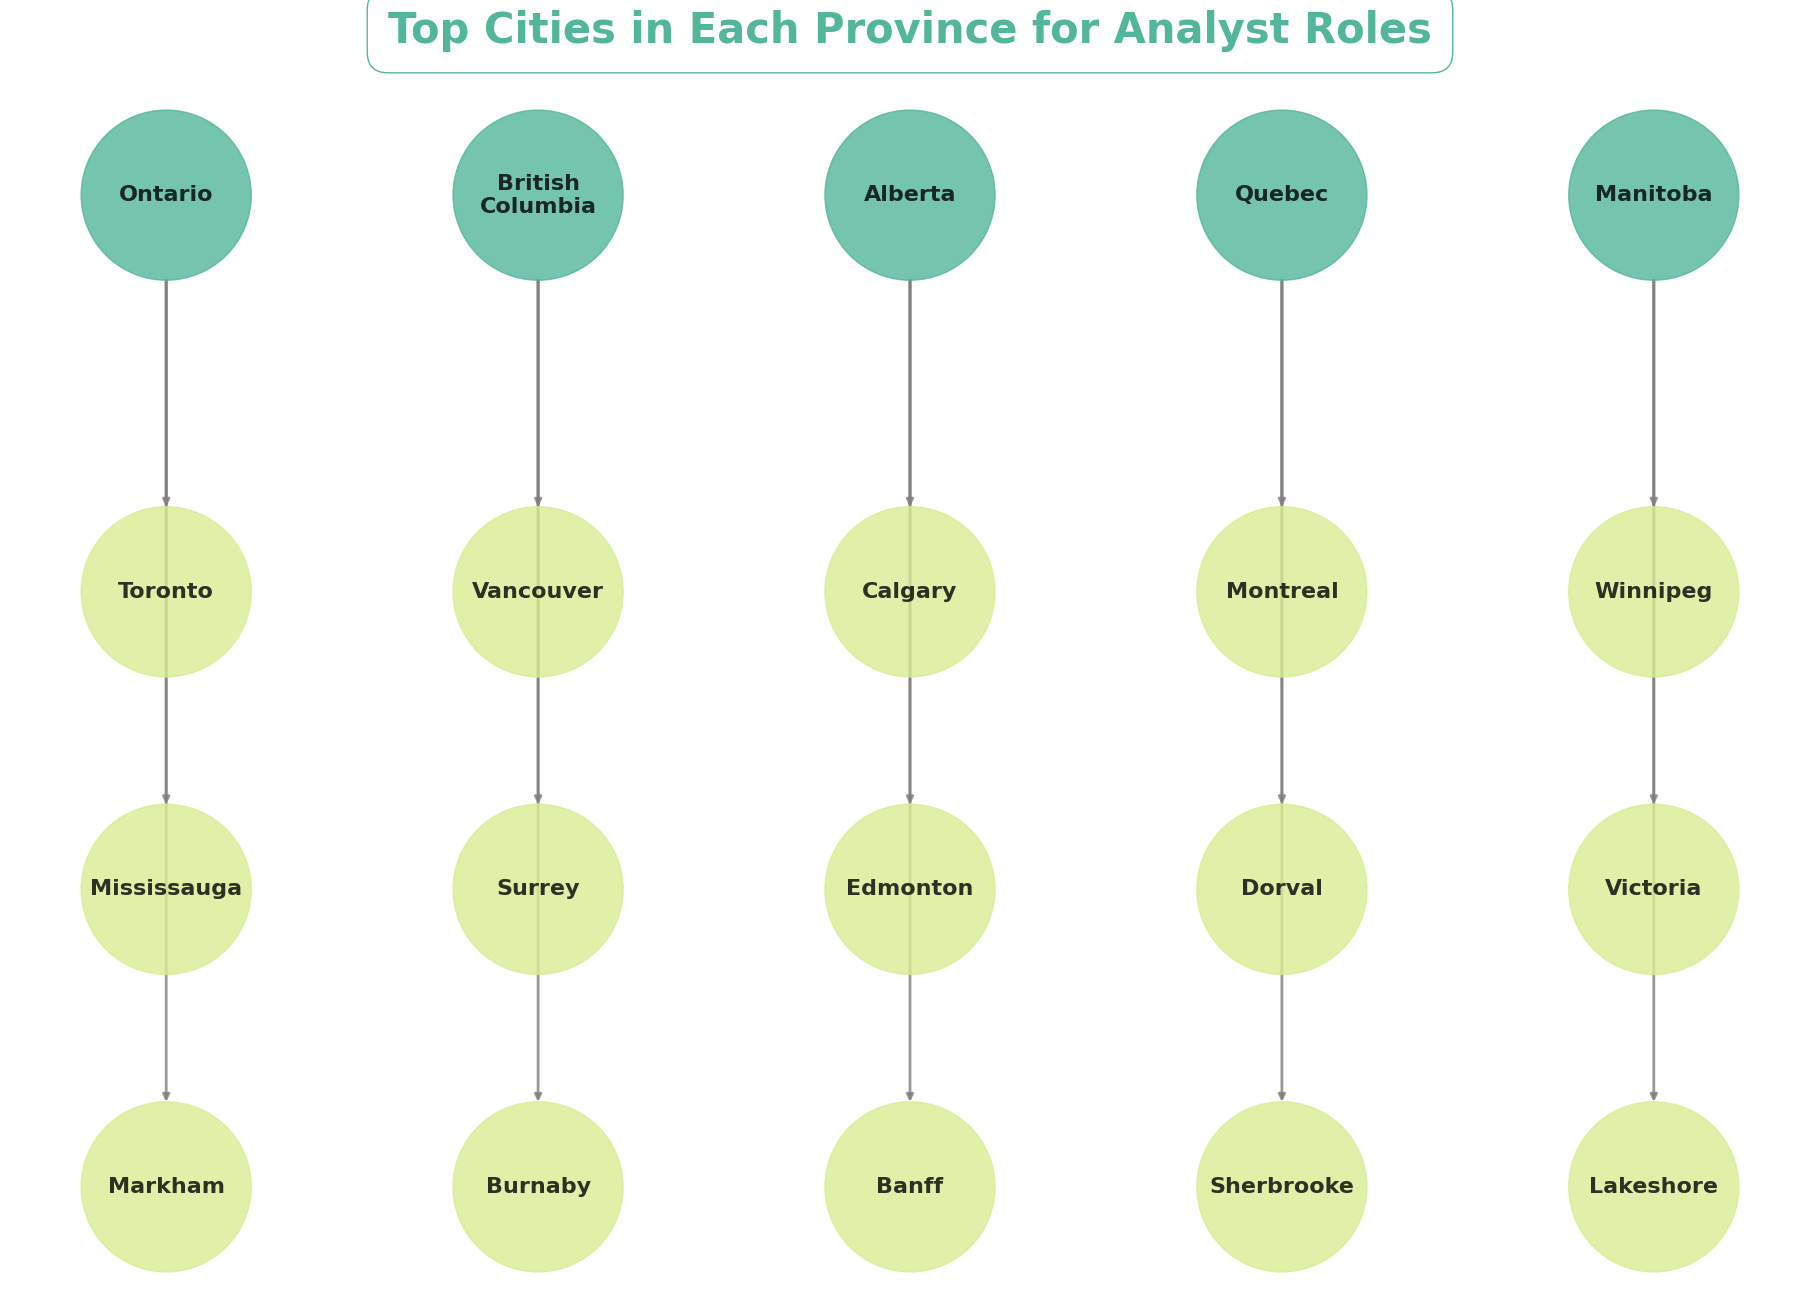

In [24]:
# Rename 'MontrÃƒÂ©al' to 'Montreal'
df['City'] = df['City'].replace('MontrÃƒÂ©al', 'Montreal')

# Define the province mapping for display purposes
province_mapping = {
    'ON': 'Ontario',
    'QC': 'Quebec',
    'AB': 'Alberta',
    'MB': 'Manitoba',
    'SK': 'Saskatchewan',
    'BC': 'British\nColumbia',
    'NS': 'Nova Scotia',
    'NB': 'New Brunswick',
    'PE': 'Prince Edward Island',
    'NL': 'Newfoundland and Labrador',
    'NT': 'Northwest Territories',
    'NFL': 'Nunavut',
    'YT': 'Yukon Territory'
}

# Get counts for provinces and cities
province_counts = df['Province'].value_counts()
city_counts = df.groupby('Province')['City'].value_counts()

# Filter out 'Undef' if present
province_counts = province_counts[province_counts.index != 'Undef']
city_counts = city_counts[city_counts.index != 'Undef']
print(city_counts)
# Get top 8 provinces by count
top_provinces = province_counts.head(5).index

# Filter city counts for the top 8 provinces
filtered_city_counts = city_counts.loc[top_provinces]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for provinces and cities
for province in top_provinces:
    province_full_name = province_mapping.get(province, province)
    G.add_node(province_full_name, layer=0)
    top_cities = filtered_city_counts[province].head(3).index
    for city in top_cities:
        # Make city names unique by appending province abbreviation internally
        unique_city_name = f"{city} ({province})"
        G.add_node(unique_city_name, layer=1)
        G.add_edge(province_full_name, unique_city_name)

# Define positions for nodes
pos = {}
# Position provinces horizontally
for i, province in enumerate(top_provinces):
    province_full_name = province_mapping.get(province, province)
    pos[province_full_name] = (i * 2, 0)
# Position cities below their respective provinces
for i, province in enumerate(top_provinces):
    province_full_name = province_mapping.get(province, province)
    top_cities = filtered_city_counts[province].head(3).index
    for j, city in enumerate(top_cities):
        unique_city_name = f"{city} ({province})"
        pos[unique_city_name] = (i * 2, -2 - j * 1.5)  # Cities placed below their provinces with spacing

# Draw the graph
plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, labels={n: n.split(' (')[0] for n in G.nodes()},
        node_size=15000, node_color=['#52b69a' if n in province_mapping.values() else '#d9ed92' for n in G.nodes()],
        edge_color='gray', font_size=16, font_weight='bold', arrows=True, alpha=0.8, width=2,
        node_shape='o', font_color='black')

plt.figtext(0.5, 1.05, 'Top Cities in Each Province for Analyst Roles', ha='center', va='center',
            fontsize=30, fontweight='bold', color='#52b69a',
            bbox=dict(facecolor='white', edgecolor='#52b69a', boxstyle='round,pad=0.5', linewidth=1))

plt.show()

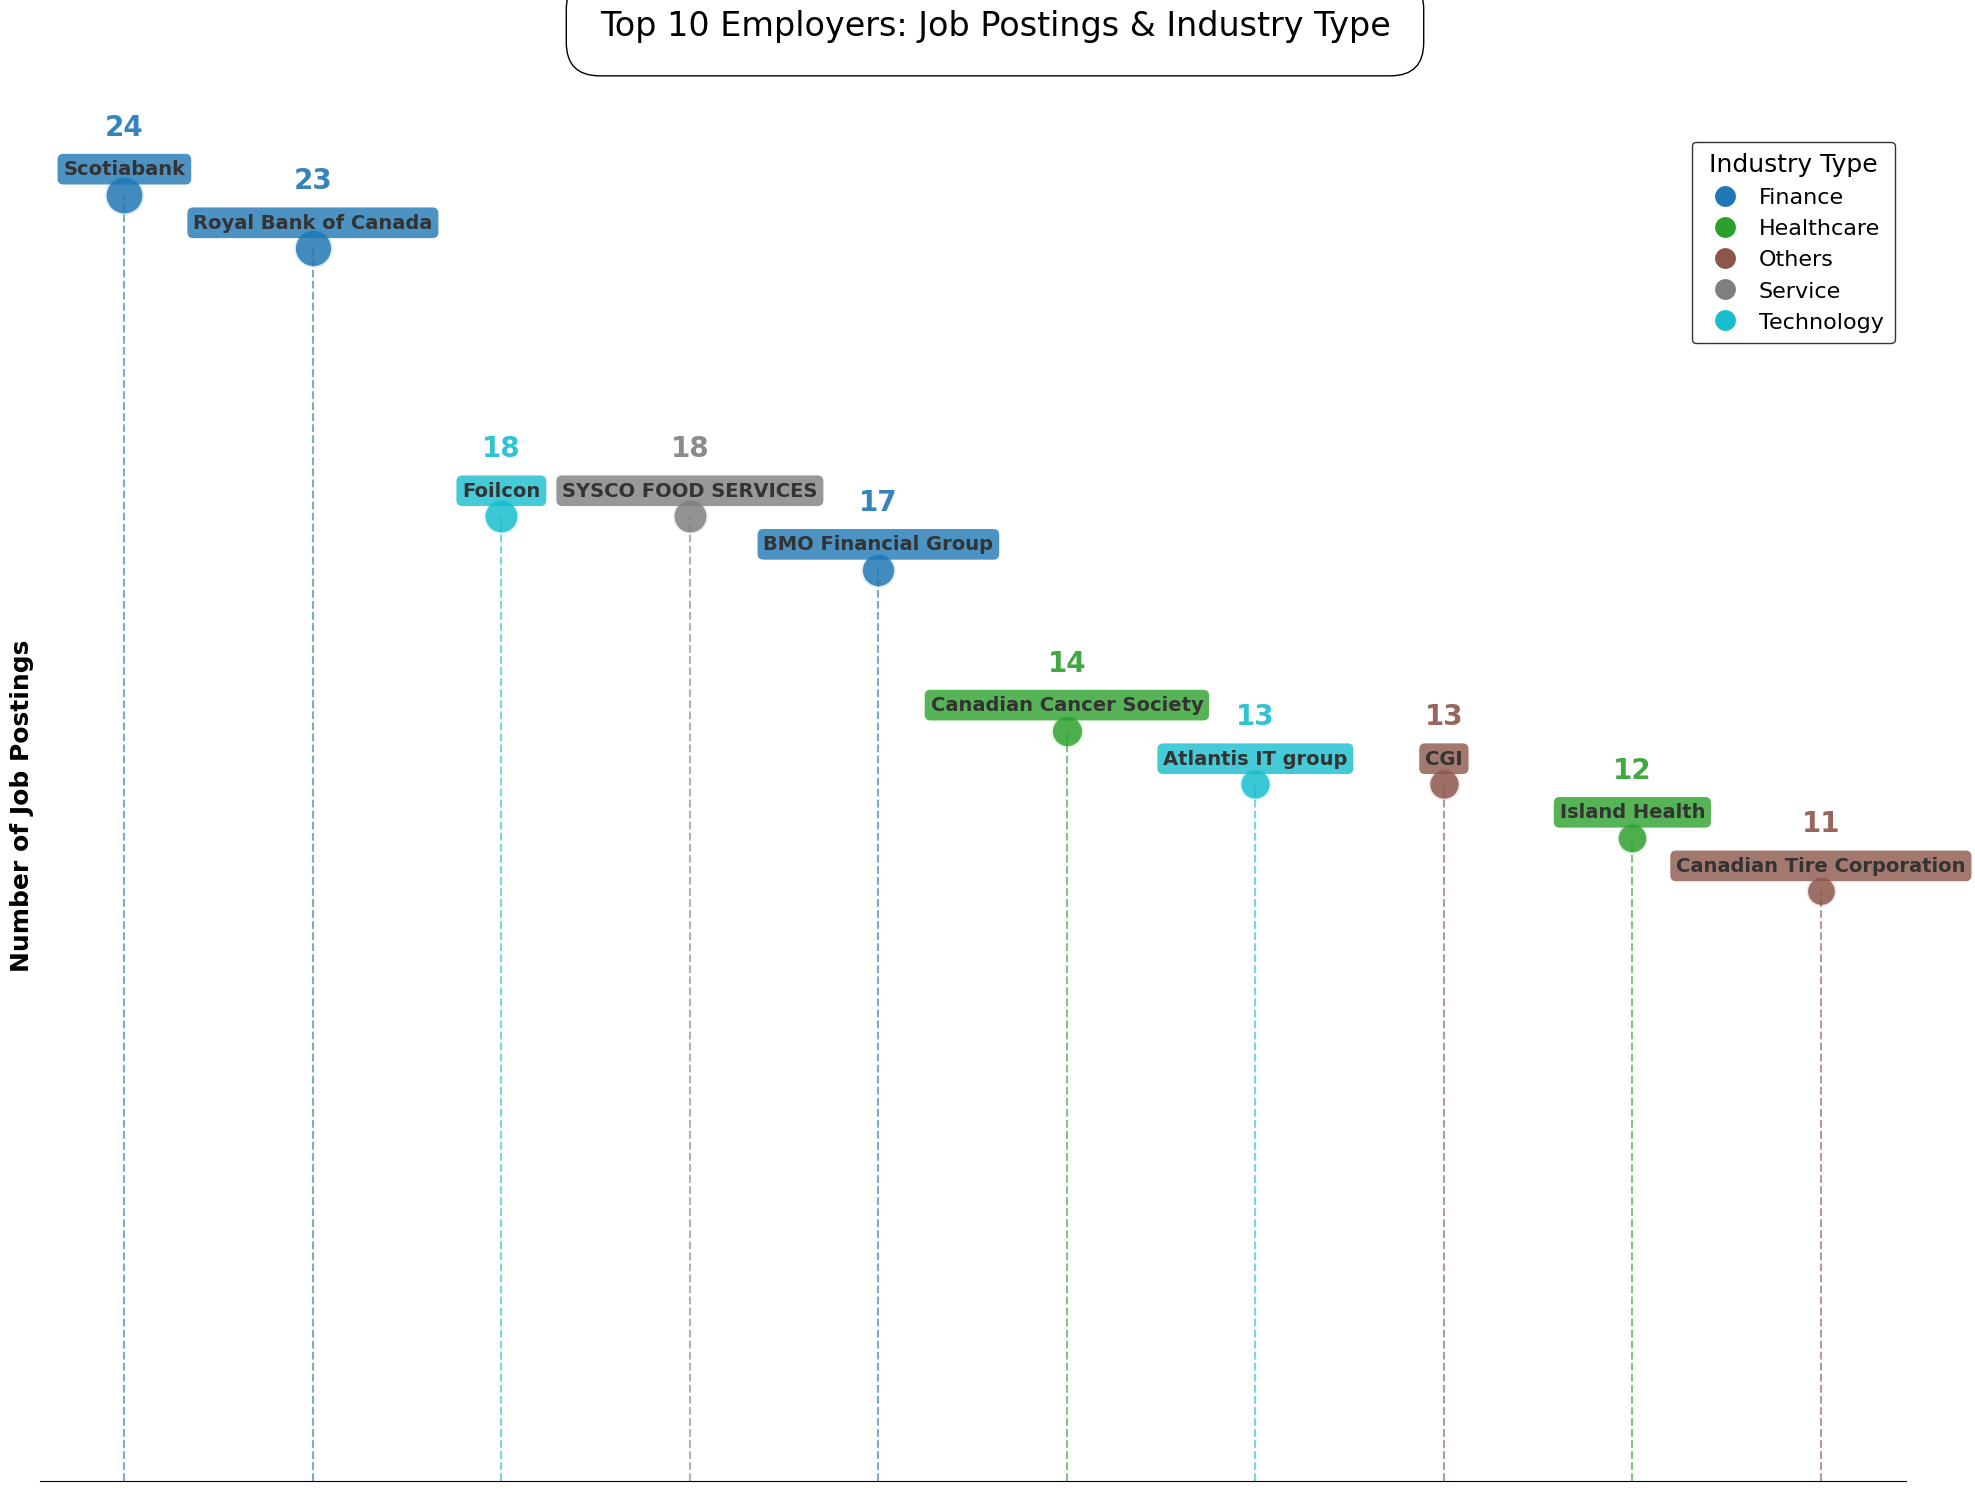

In [25]:
# Get the top 10 employers by job postings
top_employers = df['Employer'].value_counts().head(10)
top_employers_df = df[df['Employer'].isin(top_employers.index)]

# Count job postings for each top employer
job_counts = top_employers
industry_colors = pd.get_dummies(top_employers_df['Industry Type']).sum().to_dict()

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 14))


# Define simple colors for industries
colors = plt.cm.tab10(np.linspace(0, 1, len(industry_colors)))


# Bubble chart with custom color and increased marker size
for i, (employer, count) in enumerate(job_counts.items()):
    industry = top_employers_df[top_employers_df['Employer'] == employer]['Industry Type'].values[0]
    color = colors[list(industry_colors.keys()).index(industry) % len(colors)]

    # Plot the marker
    ax.scatter(employer, count, s=count * 25 + 200, color=color, alpha=0.85, edgecolors='w', linewidth=2.5)

    # Add a dotted line from the marker to the x-axis
    ax.plot([employer, employer], [0, count], linestyle='--', color=color, alpha=0.6)

    # Display the count just above the dotted line
    ax.text(employer, count + 1, f'{count}', ha='center', va='bottom', fontsize=20,
            fontweight='bold', color=color, alpha=0.9)

# Add labels with reduced height between marker and text
for i, (employer, count) in enumerate(job_counts.items()):
    industry = top_employers_df[top_employers_df['Employer'] == employer]['Industry Type'].values[0]
    color = colors[list(industry_colors.keys()).index(industry) % len(colors)]
    ax.text(employer, count + 0.3, f'{employer}', ha='center', va='bottom', fontsize=14,
            fontweight='bold', color='#333333', bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3', alpha=0.8))

# Add a unique legend with custom design inside the graph
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=16, label=industry)
           for i, industry in enumerate(industry_colors.keys())]

# Create the legend with a border
ax.legend(handles=handles, title='Industry Type', title_fontsize='18', fontsize='16', loc='upper right',
          frameon=True, edgecolor='black', facecolor='white', borderpad=0.5, borderaxespad=0.5,
          labelspacing=0.5, handletextpad=0.5)

# Set labels and title
ax.set_ylabel('Number of Job Postings', fontsize=18, fontweight='bold')
plt.figtext(0.50, 1.05, 'Top 10 Employers: Job Postings & Industry Type', ha='center', va='center',
            fontsize=24, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Ensure the figure starts from 0 on the y-axis
ax.set_ylim(0, ax.get_ylim()[1])

# Hide the y-axis ticks (but keep the label)
ax.set_yticks([])

# Remove x-axis ticks and label
ax.set_xticks([])
ax.set_xlabel('')

# Remove the figure's borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove gridlines for a cleaner look
ax.grid(False)

# Adjust layout for a better fit
plt.tight_layout()
plt.show()


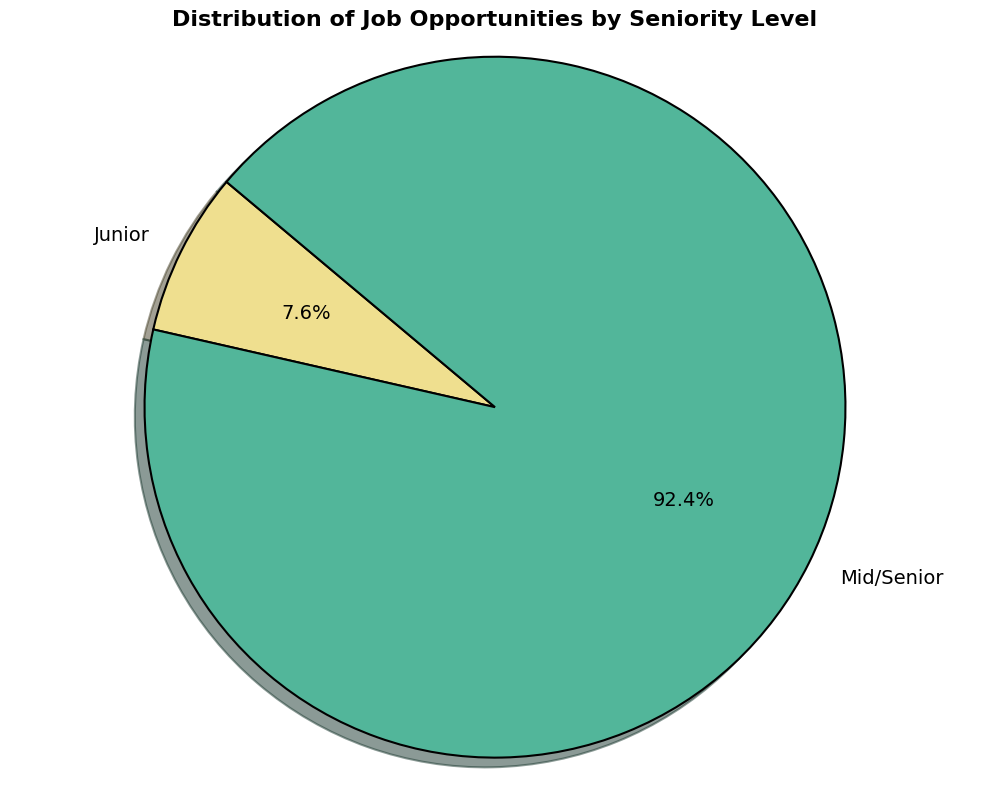

In [26]:
# Remove 'ANY' values from the 'Seniority' column
df_filtered = df[df['Seniority'] != 'ANY']

# Count job opportunities by seniority level
seniority_counts = df_filtered['Seniority'].value_counts()

# Combine 'Mid' and 'Senior' into one category
combined_counts = {
    'Junior': seniority_counts.get('Junior', 0),
    'Mid/Senior': seniority_counts.get('Mid', 0) + seniority_counts.get('Senior', 0)
}

# Convert counts to percentages
total = sum(combined_counts.values())
percentages = {key: (value / total) * 100 for key, value in combined_counts.items()}

# Define colors (green color scheme)
colors = ['#efdf8f', '#52B69A']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    percentages.values(),
    labels=percentages.keys(),
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14}
)

plt.title('Distribution of Job Opportunities by Seniority Level', fontsize=16, fontweight='bold')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

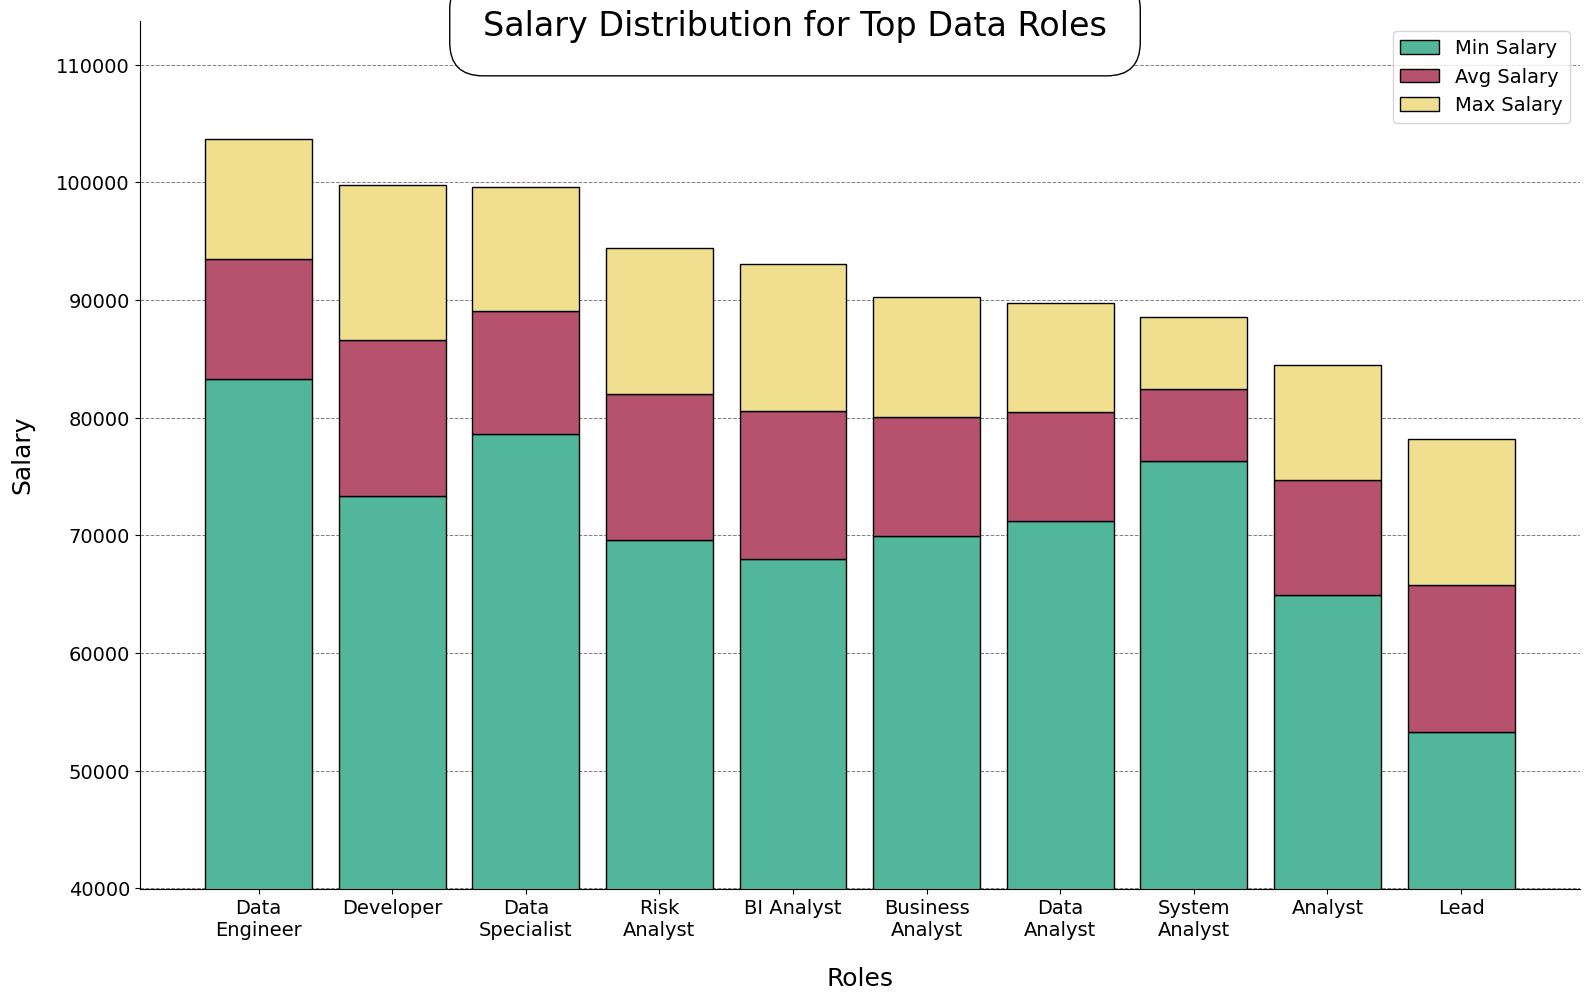

In [27]:
# Step 1: Identify the top 10 roles
top_10_roles = df['Position'].value_counts().head(10).index

# Step 2: Filter and aggregate data for the top 10 roles
filtered_df = df[df['Position'].isin(top_10_roles)]
grouped_df = filtered_df.groupby('Position').agg(
    Min_Salary=('Min_Salary', 'mean'),
    Avg_Salary=('Avg_Salary', 'mean'),
    Max_Salary=('Max_Salary', 'mean')
).sort_values(by='Max_Salary', ascending=False)

# Calculate the differences to get the correct segments
grouped_df['Avg_to_Min'] = grouped_df['Avg_Salary'] - grouped_df['Min_Salary']
grouped_df['Max_to_Avg'] = grouped_df['Max_Salary'] - grouped_df['Avg_Salary']

# Step 3: Create the vertical stacked bar graph
plt.figure(figsize=(16, 10))
bar_width = 0.5

# Using a custom color palette
colors = ["#52B69A", "#b6526e", "#efdf8f"]

# Plotting the bars
plt.bar(grouped_df.index, grouped_df['Min_Salary'], color=colors[0], edgecolor='black', label='Min Salary')
plt.bar(grouped_df.index, grouped_df['Avg_to_Min'], color=colors[1], edgecolor='black', label='Avg Salary', bottom=grouped_df['Min_Salary'])
plt.bar(grouped_df.index, grouped_df['Max_to_Avg'], color=colors[2], edgecolor='black', label='Max Salary', bottom=grouped_df['Avg_Salary'])

# Adding labels and title
plt.ylabel('Salary', fontsize=18, labelpad=16)
plt.xlabel('Roles', fontsize=18, labelpad=20)
plt.figtext(0.50, 0.98, 'Salary Distribution for Top Data Roles', ha='center', va='center',
            fontsize=24, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Customizing y-axis
plt.ylim(40000, grouped_df['Max_Salary'].max() + 10000)
plt.yticks(range(40000, int(grouped_df['Max_Salary'].max()) + 10000, 10000), fontsize=14)

# Customizing x-axis and wrapping text
# Wrapping text on x-axis labels
wrapped_labels = [textwrap.fill(label, 10) for label in grouped_df.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=14, rotation=0, ha='center')
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.gca().set_axisbelow(True)  # Ensures grid lines are behind the bars

# Adding legend
plt.legend(fontsize=14)

# Remove the figure's borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


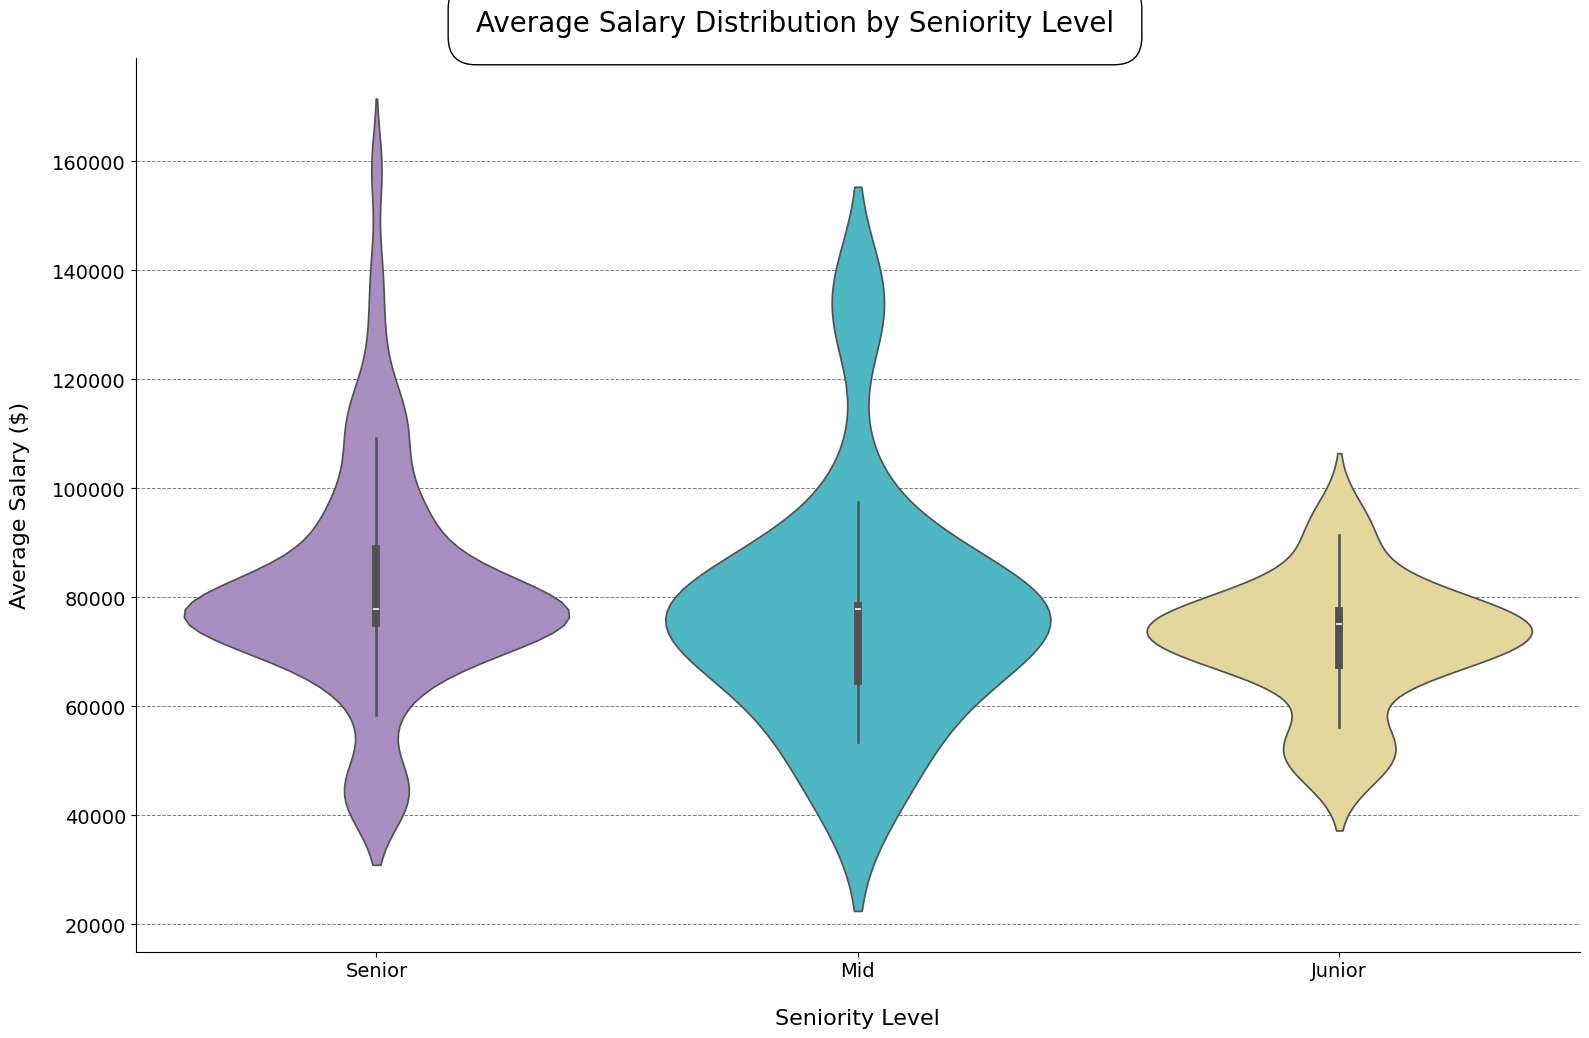

In [28]:
# Remove 'Any' value (if present)
df_filtered = df[df['Seniority'] != 'ANY']

# Extract the Avg_Salary data
df_avg_salary = df_filtered[['Seniority', 'Avg_Salary']]

colors = ['#A985CB', '#3AC7D6', '#efdf8f']

# Create the violin plot for Avg_Salary
plt.figure(figsize=(16, 10))
sns.violinplot(x='Seniority', y='Avg_Salary', data=df_avg_salary, hue='Seniority', legend=False, inner='box', palette=colors)

# Adding labels and title
plt.ylabel('Average Salary ($)', fontsize=16, labelpad=16)
plt.xlabel('Seniority Level', fontsize=16, labelpad=20)
plt.figtext(0.50, 1.02, 'Average Salary Distribution by Seniority Level', ha='center', va='center',
            fontsize=20, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.gca().set_axisbelow(True)  # Ensures grid lines are behind the bars


# Remove the figure's borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

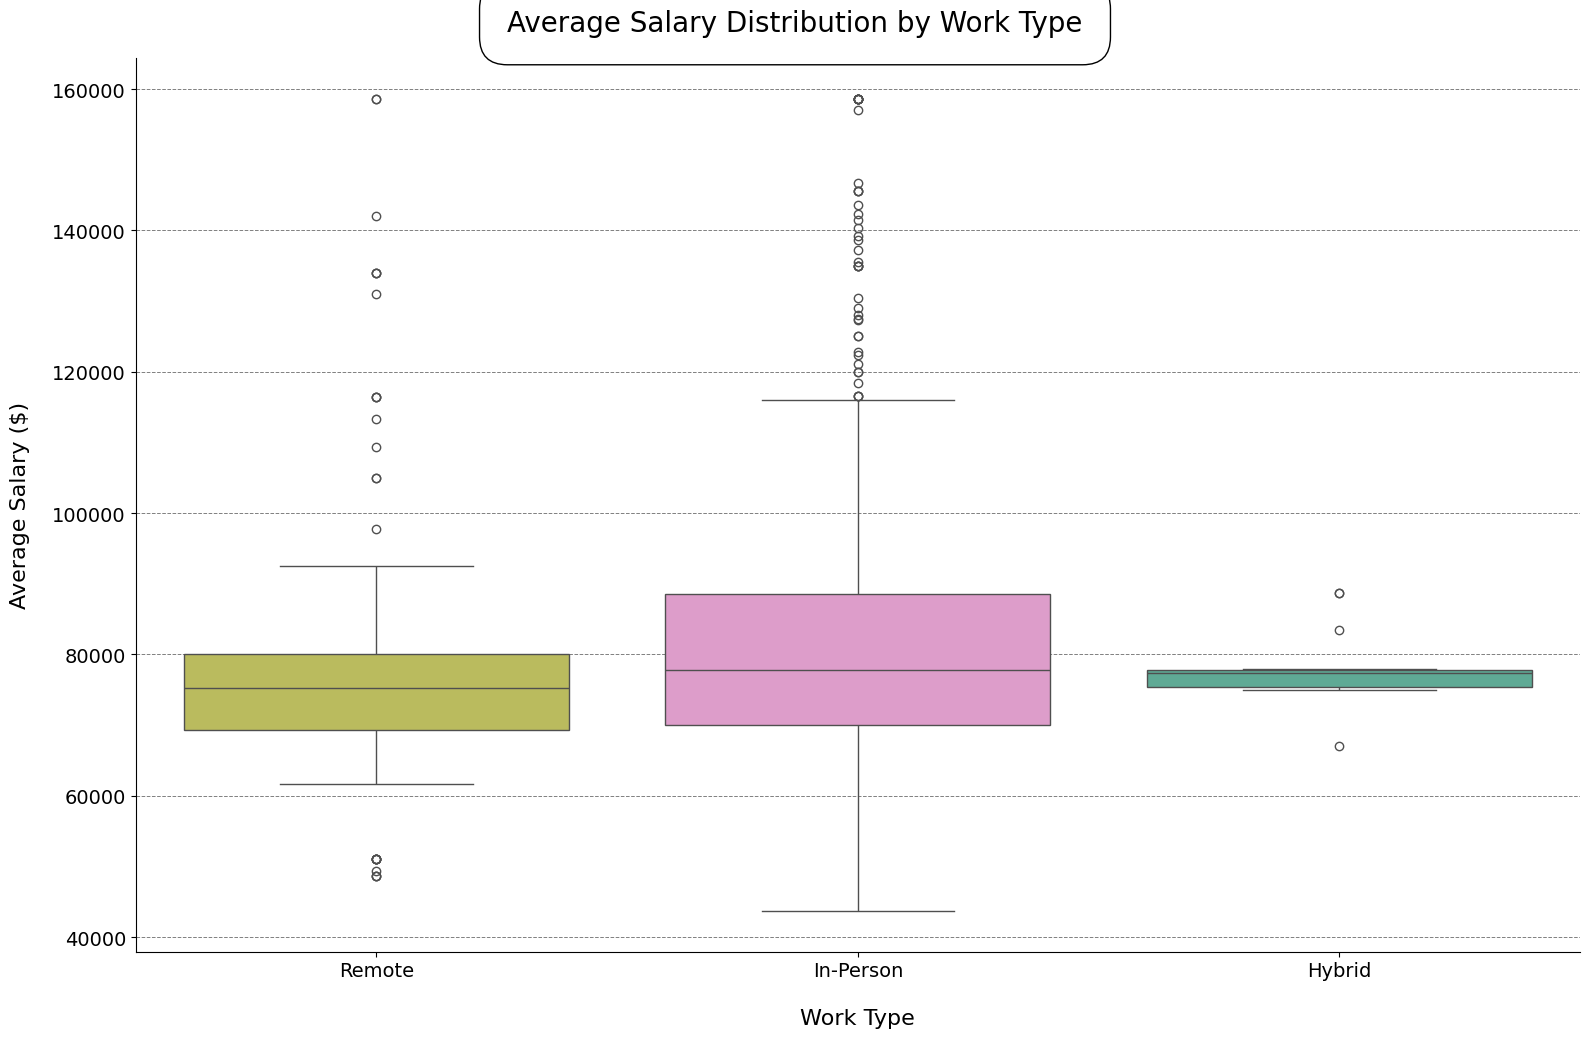

In [29]:
# Extract the Avg_Salary data
df_avg_salary = df[['Work Type', 'Avg_Salary']]

colors = ['#C9CA4E','#E892CE','#52B69A']

# Create the box plot for Avg_Salary
plt.figure(figsize=(16, 10))
sns.boxplot(x='Work Type', y='Avg_Salary', data=df_avg_salary, hue='Work Type', palette=colors)

# Adding labels and title
plt.ylabel('Average Salary ($)', fontsize=16, labelpad=16)
plt.xlabel('Work Type', fontsize=16, labelpad=20)
plt.figtext(0.50, 1.02, 'Average Salary Distribution by Work Type', ha='center', va='center',
            fontsize=20, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.gca().set_axisbelow(True)  # Ensures grid lines are behind the boxes

# Remove the figure's borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()